In [1]:
import pandas as pd
import re

In [38]:
# tag_live 크롤링.
df = pd.read_csv("/content/drive/My Drive/tag_live.csv")
df = df[["text", "keyword"]]
df[:10]

,text,keyword
0,"검찰, 추미애 아들 '특혜휴가 의혹' 관련 국방부 압수수색 | 다음 https://...",anger
1,"조국 분노 ""내 딸에 추잡한 '성적 허위사실' 쏟아낸 일베 가만 안두겠다"" http...",anger
2,으으으으으아아아아아아!!!!!#분노그림록5시간 전00으으으으으아아아아아아!!!!!#분노,anger
3,#분노당선되니 의원 재산 1700억원 증가신고액 기준 평균 10억씩 늘어이런 나쁜놈...,anger
4,"""우리도 전화찬스 한번 써보자"" 추미애 아들에 들끓는 軍心 https://t.co/...",anger
5,"[단독] 전주혜 ""부대장 승인기록 없으면 탈영, 그게 대법판례"" https://t....",anger
6,"문 대통령의 베를린구상, 한반도 전쟁위기 타개책이었다 #베를린_구상 #한반도_평화...",anger
7,"이봐요, 왜들 이래요? (게임인걸요, 볼펠……!) 탁자에서 내려와! #분노 #씩씩 ...",anger
8,#분노 https://t.co/70DmZLp0Uy쌍쌍바하루 전00#분노 https:...,anger
9,으으으으으아아아아아아!!!!!#분노그림록하루 전00으으으으으아아아아아아!!!!!#분노,anger


In [39]:
df.columns = ["text", "sentiment"]

print(df["text"][3])
print(df["sentiment"][3])

#분노당선되니 의원 재산 1700억원 증가신고액 기준 평균 10억씩 늘어이런 나쁜놈들이 적폐다#거짓_정치인#사기꾼_정치인#비윤리적#나쁜놈들이다5W1H7시간 전00#분노 당선되니 의원 재산 1700억원 증가신고액 기준 평균 10억씩 늘어이런 나쁜놈들이 적폐다#거짓_정치인#사기꾼_정치인#비윤리적#나쁜놈들이다 
anger


In [40]:
df.sentiment.value_counts()

anger       140
sadness     140
love        118
neutral     106
fear         97
joy          90
surprise     51
Name: sentiment, dtype: int64

In [41]:
df.sentiment.unique()

array(['anger', 'fear', 'joy', 'love', 'neutral', 'sadness', 'surprise'],
      dtype=object)

In [42]:
# 빌려온 csv파일
df1 = pd.read_csv("/content/drive/My Drive/test_data.tsv", sep="\t", header=None, encoding="UTF-8")
df1.columns = ["sentiment", "text"]

df1 = df1[["text", "sentiment"]]
df1 = df1.dropna()

In [43]:
df1.sentiment.value_counts()

joy         588
sadness     293
anger       154
neutral     147
surprise    110
love         53
fear         20
Name: sentiment, dtype: int64

In [104]:
df2 = pd.read_csv("/content/drive/My Drive/origin_tag_live.csv")
df2 = df2[["text", "keyword"]]
df2.columns = ["text", "sentiment"]

df2

,text,sentiment
0,늘 즐겁고 재밌는 유익한 시간이 되세요 - 우리집 고양이 화났음이건 고양인지 호랑이...,anger
1,#자기#똥서유니라고#놀렷다그#화났음 #아진~짜이상하네#세살의반란#자기#똥서유니라고#...,anger
2,#화났음#인상파#코에 상처# 잠깐 한눈 판 사이에 긁어놓음#상처엔 마데카솔?#화났음...,anger
3,#화났음#사진#제발이뿌게좀..#발이야발#ㅋㅋ#오늘도맑음#하늘도맑음#오늘의운동화#컨버...,anger
4,거울만 보면 힘 주기 바쁨🏋🏻‍♂️#헬창남치...,anger
...,...,...
558,맛집 고기리막국수 드뎌 가봄! 들기름막국수 신기하네요~위에 올려져있던 양념장을 잘 ...,surprise
559,줄기세포 마스크팩 알파젠 신기하네줄기세포 마스크팩 알파젠 신기하네 알파젠 마스크팩 ...,surprise
560,"홈메이드 수제 막걸리 만들기, 잼나고 신기하네요~~♬홈메이드 수제 막걸리를 만들어 ...",surprise
561,"인천외장하드복구, 진짜신기하네요.인천외장하드복구, 진짜 신기하네요! 누구나 외장하드...",surprise


# 데이터프레임 합치기

In [105]:
# df + df1 데이터프레임 합치기.
df = df.append(df1)
df = df.append(df2)

In [106]:
# 데이터 프레임 셔플
df = df.sample(frac=1, random_state=42).reset_index(drop=True)

# 전처리 해봐야 할것
- 문장에 url 주소들이 많은 것들.
- 반복되는 문장

In [107]:
def clean_str(text):
    pattern = '([a-zA-Z0-9_.+-]+@[a-zA-Z0-9-]+\.[a-zA-Z0-9-.]+)' # E-mail제거
    text = re.sub(pattern=pattern, repl=' ', string=text)
    # pattern = '(http|ftp|https)://(?:[-\w.]|(?:%[\da-fA-F]{2}))+' # URL제거
    pattern = 'https?://(\w*:\w*@)?[-\w.]+(:\d+)?(/([\w/_.]*(\?\S+)?)?)?' # URL제거
    # pattern = '/^(file|gopher|news|nntp|telnet|https?|ftps?|sftp):\/\/([a-z0-9-]+\.)+[a-z0-9]{2,4}.*$/' # URL제거
    text = re.sub(pattern=pattern, repl=' ', string=text)
    pattern = '([ㄱ-ㅎㅏ-ㅣ]+)'  # 한글 자음, 모음 제거
    text = re.sub(pattern=pattern, repl=' ', string=text)
    pattern = '<[^>]*>'         # HTML 태그 제거
    text = re.sub(pattern=pattern, repl=' ', string=text)
    pattern = '[^\w\s]'         # 특수기호제거
    text = re.sub(pattern=pattern, repl='', string=text)
    pattern = '(amp)|(gt)|(lt)|_|[0-9]'         # amp 제거
    text = re.sub(pattern=pattern, repl=' ', string=text)
    return text   

In [108]:
# 전처리 실행
df["text"] = df["text"].apply(lambda x: clean_str(x))

In [110]:
df.shape

(2696, 2)

# 여기다 신영님이 보내주신 코드 넣기

In [109]:
# 문자열의 길이를 세서 100글자 이내라면 삭제
sum=0

change_csv= pd.DataFrame(columns=['text', "sentiment"])

for i in range(len(df['text'])):
  if(len(df['text'][i])>=100): #길이가 100이상이면
    change_csv.loc[sum]=df.loc[i]
    sum+=1
# print(change_csv)

# csv 저장
change_csv.to_csv('tag1_live.csv')

In [111]:
df = pd.read_csv("/content/tag1_live.csv")

In [112]:
df = df.drop(columns=["Unnamed: 0"])

In [113]:
df.shape

(1439, 2)

# 훈련셋 테스트셋 split

In [128]:
# text
text = df["text"][:-300]
# BERT의 입력 형식에 맞게 변환
text = ["[CLS] " + str(sentence) + " [SEP]" for sentence in text]
text[:10]
len(text)

1139

# 문장길이 확인 (사용 X)

In [ ]:
# text
test_text = df["text"][:-600]
test_text

0                                                아 외롭다   
1       너무쩐다이거 자살하기 전에 사랑하는 사람 불러서 살짝 이마 눌러주고 웃어주고    ...
2                           우현시  사랑해     분 전   우현시  사랑해  
3       신혼일기                우울    아침부터 허무한 일이 있어서 갑자기 ...
4       카톡 주록러소록오기엑중될단수고민상담  심리상담  남성성고민              ...
                              ...                        
1502    요즘 상태가 불안정하다 더 심각한 사람들이랑 비교하자면 안정적이지만 모래성 마냥 천...
1503                                    나 오늘 너무 예쁜 것 같다  
1504                                           돌려돌려 행복회로 
1505             기타치는거 궁금해서 감질맛났 는데   고양 이러버인것 마저 완전짱이야  
1506    대충쓰는 친구 여동생 짜증 리뷰  친구 여동생이 나한테만 짜증나게 군다    L노벨...
Name: text, Length: 1507, dtype: object

In [ ]:
ntext = []

for sentence in test_text:
  # token = []
  words = sentence.split()

  ntext.append(words)
  
print(ntext)

[['친정엄마때문에', '화나요', '어제', '오랜만에', '친정에', '다녀왔어요', '저녁을', '삼겹살', '궈서', '신랑이랑', '저랑', '엄마랑', '셋이서', '먹음서', '술도', '한잔', '했더랬죠', '다먹고', '술한잔', '하며', '얘기하다가', '한번씩', '나오는', '울엄마', '레파토리가', '시작되네요', '엄마', 'roof_76130님의블로그8일', '전00친정엄마때문에', '화나요', '어제', '오랜만에', '친정에', '다녀왔어요', '저녁을', '삼겹살', '궈서', '신랑이랑', '저랑', '엄마랑', '셋이서', '먹음서', '술도', '한잔', '했더랬죠', '다먹고', '술한잔', '하며', '얘기하다가', '한번씩', '나오는', '울엄마', '레파토리가', '시작되네요', '엄마'], ['카메라등이용촬영죄', '협박의', '두려움에카메라등이용촬영죄', '협박의', '두려움에', '지난', '5', '6년', '전에', '발발된', '안건입니다', '약', 'l80명의', '여성분의', '원피스', '의한', '두려움에', '떠는', '피해자', '수는', '급격히', '늘어난', '겁니다', '각별히', '불과', '10년', '전만', '해도', '휴대전화에', '탑재된', '법무법인', '심평한달', '전00카메라등이용촬영죄', '협박의', '두려움에카메라등이용촬영죄', '협박의', '두려움에', '지난', '5', '6년', '전에', '발발된', '안건입니다', '약', 'l80명의', '여성분의', '원피스', '의한', '두려움에', '떠는', '피해자', '수는', '급격히', '늘어난', '겁니다', '각별히', '불과', '10년', '전만', '해도', '휴대전화에', '탑재된'], ['2020', '09', '16', '개는자기', '자신보다', '당신을', '더', '사랑하는', '유일한', '생명체입니다', '강아지와', '공원을', '산책하고', '싶은', '가을', '아침입니

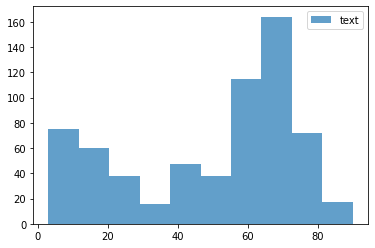

In [ ]:
import matplotlib.pyplot as plt

len_text = []
for data in ntext:
    len_text.append(len(data))
# 단어의 개수가 25개 미만 수가 대부분을 차지한다.
plt.hist(len_text, label='text', alpha=0.7)

plt.legend()
plt.show()

# Label to Integer

In [126]:
# label이 문자이므로 숫자값으로 바꿔줘야함 - LabelEncoder
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

sentiment = label_encoder.fit_transform(df["sentiment"][:-300])


# sentiment = sentiment.reshape(-1,1)
sentiment.shape

(1139,)

In [125]:
label_encoder.classes_
# label_encoder.inverse_transform(sentiment)

array(['anger', 'fear', 'joy', 'love', 'neutral', 'sadness', 'surprise'],
      dtype=object)

In [58]:
# 트랜스 포머 설치
!pip install transformers

In [119]:
import tensorflow as tf
import torch

from transformers import BertTokenizer
from transformers import BertForSequenceClassification, AdamW, BertConfig
from transformers import get_linear_schedule_with_warmup
from torch.utils.data import TensorDataset, DataLoader, RandomSampler, SequentialSampler
from keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split

import pandas as pd
import numpy as np
import random
import time
import datetime

In [120]:
# BERT의 토크나이저로 문장을 토큰으로 분리
tokenizer = BertTokenizer.from_pretrained('bert-base-multilingual-cased', do_lower_case=False)
tokenized_texts = [tokenizer.tokenize(sent) for sent in text]

print (text[0])
print (tokenized_texts[0])

[CLS] Q 고교시절 인기있던 여자애는 어떤애  사랑스러운애 어떤 행동을 하고 있어도 사랑스럽게 보이는 애 있잖아요 보고있으면 이쪽이 미소를 짓게되는 그런 여자애가 인기있었다고 생각해요 일본의 여고생분들은 맑은 인상이 있어요 혼자 우울 [SEP]
['[CLS]', 'Q', '고', '##교', '##시', '##절', '인', '##기', '##있', '##던', '여자', '##애', '##는', '어떤', '##애', '사', '##랑', '##스', '##러', '##운', '##애', '어떤', '행', '##동을', '하고', '있어', '##도', '사', '##랑', '##스', '##럽', '##게', '보', '##이는', '애', '[UNK]', '보고', '##있', '##으면', '이', '##쪽', '##이', '미', '##소를', '짓', '##게', '##되는', '그', '##런', '여자', '##애', '##가', '인', '##기', '##있', '##었다', '##고', '생', '##각', '##해', '##요', '일본의', '여', '##고', '##생', '##분', '##들은', '맑', '##은', '인', '##상이', '있어', '##요', '혼', '##자', '우', '##울', '[SEP]']


In [129]:
# 입력 토큰의 최대 시퀀스 길이
MAX_LEN = 256

# 토큰을 숫자 인덱스로 변환
input_ids = [tokenizer.convert_tokens_to_ids(x) for x in tokenized_texts]

# 문장을 MAX_LEN 길이에 맞게 자르고, 모자란 부분을 패딩 0으로 채움
input_ids = pad_sequences(input_ids, maxlen=MAX_LEN, dtype="long", truncating="post", padding="post")

input_ids[0]

array([   101,    154,   8888,  25242,  14040,  58931,   9640,  12310,
       119192,  23990,  62592, 119121,  11018,  55910, 119121,   9405,
        62200,  12605,  30873,  21614, 119121,  55910,   9966,  69448,
        32487,  45893,  12092,   9405,  62200,  12605, 118867,  14153,
         9356,  31728,   9532,    100,  98199, 119192,  80046,   9638,
        22028,  10739,   9309,  86488,   9712,  14153,  24683,   8924,
        56710,  62592, 119121,  11287,   9640,  12310, 119192,  17706,
        11664,   9420,  66540,  14523,  48549,  44757,   9565,  11664,
        24017,  37712,  22879,   9252,  10892,   9640,  83902,  45893,
        48549,   9987,  13764,   9604,  78123,    102,      0,      0,
            0,      0,      0,      0,      0,      0,      0,      0,
            0,      0,      0,      0,      0,      0,      0,      0,
            0,      0,      0,      0,      0,      0,      0,      0,
            0,      0,      0,      0,      0,      0,      0,      0,
      

In [130]:
# 어텐션 마스크 초기화
attention_masks = []

# 어텐션 마스크를 패딩이 아니면 1, 패딩이면 0으로 설정
# 패딩 부분은 BERT 모델에서 어텐션을 수행하지 않아 속도 향상
for seq in input_ids:
    seq_mask = [float(i>0) for i in seq]
    attention_masks.append(seq_mask)

print(attention_masks[0])

[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,

In [131]:
# 훈련셋과 검증셋으로 분리
train_inputs, validation_inputs, train_labels, validation_labels = train_test_split(input_ids,
                                                                                    sentiment, 
                                                                                    random_state=2020, 
                                                                                    test_size=0.2)

# 어텐션 마스크를 훈련셋과 검증셋으로 분리
train_masks, validation_masks, _, _ = train_test_split(attention_masks, 
                                                       input_ids,
                                                       random_state=2020, 
                                                       test_size=0.2)

# 데이터를 파이토치의 텐서로 변환
train_inputs = torch.tensor(train_inputs)
train_labels = torch.tensor(train_labels)
train_masks = torch.tensor(train_masks)
validation_inputs = torch.tensor(validation_inputs)
validation_labels = torch.tensor(validation_labels)
validation_masks = torch.tensor(validation_masks)				

print(train_inputs[0])
print(train_labels[0])
print(train_masks[0])
print(validation_inputs[0])
print(validation_labels[0])
print(validation_masks[0])

train_inputs.shape, train_labels.shape, train_masks.shape

tensor([   101,   9854,  18227,  47181,   9238, 118666,  72949,  27355,  25486,
         18108,   9248,  16439,   9095,  25549,  62484,   9548,  37114,  10530,
          9405,  14040,  11018,   9997,  12945,  13890, 108578, 118683,  12424,
         19653,   9703, 118626,  14153,   9056,  50814, 119153,   9460,  90587,
           100,   9665,  22766,   9270,  18623,   9405,  18623,  10622,   9786,
        119357,  11467,   9356,  31605,  87281,  11664,   9668,  71013, 118611,
         18382,   9706, 118992,  14523,  16323,  25387,  28911,  68357,   8848,
         32159,   9113,  71104,  13764,  42815,  11513,   9737,  11018,   9409,
          9061,   9665,   9854,  18227,  47181,   9238, 118666,  72949,  27355,
         25486,  18108,   9248,  16439,   9095,  25549,  62484,   9548,  37114,
         10530,   9405,  14040,  11018,   9997,  12945,  13890, 108578, 118683,
         12424,  19653,   9703, 118626,  14153,   9056,  50814, 119153,   9460,
         90587,    100,   9665,  22766, 

(torch.Size([911, 256]), torch.Size([911]), torch.Size([911, 256]))

In [132]:
# 배치 사이즈
batch_size = 16

# 파이토치의 DataLoader로 입력, 마스크, 라벨을 묶어 데이터 설정
# 학습시 배치 사이즈 만큼 데이터를 가져옴
train_data = TensorDataset(train_inputs, train_masks, train_labels)
train_sampler = RandomSampler(train_data)
train_dataloader = DataLoader(train_data, sampler=train_sampler, batch_size=batch_size)

validation_data = TensorDataset(validation_inputs, validation_masks, validation_labels)
validation_sampler = SequentialSampler(validation_data)
validation_dataloader = DataLoader(validation_data, sampler=validation_sampler, batch_size=batch_size)

In [133]:
# 테스트 셋
test_sentences = df["text"][-300:]
test_sentences

1139    감정만이 전부가아닌 연애 명언감정만이 전부가 아닌 연애 명언을 모아봤어 우리는 사랑...
1140    샤오미 미밴드  간단 후기 및 사용법 가성비에 놀람샤오미 미밴드  간단 후기 및 사...
1141    MBTI 유형별 사랑해 말하는 시점  영어유머당신은 언제 사랑한다 말할까 MBTI ...
1142    네이버라이브쇼핑  편인터라켄의  가지 소파모델과 깜짝행 네이버라이브쇼핑  편인터라켄...
1143    당선 되면 찾아 오겠다고 약속한 김정숙 여사님 진주 중앙 시장 상인들 반응 약속 지...
                              ...                        
1434    화났음인상파코에 상처 잠깐 한눈 판 사이에 긁어놓음상처엔 마데카솔화났음인상파코에 상...
1435     코스 화남 생가 가는 길 길상면온수천덕진진광성보화남생 오늘은 화남 생가 가는 코스...
1436    맘에 안드는 그림 투척 옆에는 저의 모습입니다 그림 드로잉 그림스타그램 그림쟁이 캐...
1437    kims의 픽건 더블 드래곤 리뷰오늘 픽건에게 미치도록 화났음모두들 안녕 kims ...
1438     월의 마지막 날  월인데 봄은 오데 가고 그렇게도 더웠나 새삼 놀란다 그러고보니 ...
Name: text, Length: 300, dtype: object

In [134]:
# BERT의 입력 형식에 맞게 변환
test_sentences = ["[CLS] " + str(sentence) + " [SEP]" for sentence in test_sentences]
test_sentences[:10]

['[CLS] 감정만이 전부가아닌 연애 명언감정만이 전부가 아닌 연애 명언을 모아봤어 우리는 사랑을 할 때나 연애를 할 때 항상 감정에 충실한 것 같아 좋으면 좋고 싫으면 싫고 하지만 좋은 점이 있으면 나쁜 점도 있고 행복한 떼이군의 연애공식 삶의공식  일 전  감정만이 전부가아닌 연애 명언감정만이 전부가 아닌 연애 명언을 모아봤어 우리는 사랑을 할 때나 연애를 할 때 항상 감정에 충실한 것 같아 좋으면 좋고 싫으면 싫고 하지만 좋은 점이 있으면 나쁜 점도 있고 행복한  [SEP]',
 '[CLS] 샤오미 미밴드  간단 후기 및 사용법 가성비에 놀람샤오미 미밴드  간단 후기 및 사용법 가성비에 놀람 운동을 다시금 시작하고 나면서 간단하게 도움을 받을 수 있는 것이 없을까 찾아보다가 인터넷에서도 주변에서도 많이 사용하는 샤오미 미밴드  제품을 트리키의 행복한 라이프로그 달 전  샤오미 미밴드  간단 후기 및 사용법 가성비에 놀람샤오미 미밴드  간단 후기 및 사용법 가성비에 놀람 운동을 다시금 시작하고 나면서 간단하게 도움을 받을 수 있는 것이 없을까 찾아보다가 인터넷에서도 주변에서도 많이 사용하는 샤오미 미밴드  제품을  [SEP]',
 '[CLS] MBTI 유형별 사랑해 말하는 시점  영어유머당신은 언제 사랑한다 말할까 MBTI 유형별 사랑해 말하는 시점 안녕하세요 환영합니다 야나두 블로그지기입니다 오늘은 MBTI 유형별 사랑해 말하는 시점 즉 과연 연애 시작 후 야나두 영어회화 공식블로그 달 전  MBTI 유형별 사랑해 말하는 시점  영어유머당신은 언제 사랑한다 말할까 MBTI 유형별 사랑해 말하는 시점 안녕하세요 환영합니다 야나두 블로그지기입니다 오늘은 MBTI 유형별 사랑해 말하는 시점 즉 과연 연애 시작 후  [SEP]',
 '[CLS] 네이버라이브쇼핑  편인터라켄의  가지 소파모델과 깜짝행 네이버라이브쇼핑  편인터라켄의  가지 소파모델과 깜짝행사 안내 소파 소개및 판매 그리고 깜짝행사도 있음  월  일 네이버라이브쇼핑 과 인터라켄의 콜라보소식이 있네요

In [135]:
# label이 문자이므로 숫자값으로 바꿔줘야함 - LabelEncoder
from sklearn.preprocessing import LabelEncoder
test_label_encoder = LabelEncoder()

test_sentiment = test_label_encoder.fit_transform(df["sentiment"][-300:])

test_sentiment

array([3, 6, 3, 6, 2, 0, 1, 2, 1, 1, 3, 5, 2, 3, 3, 2, 0, 0, 0, 5, 2, 1,
       1, 4, 3, 5, 0, 3, 2, 2, 0, 2, 5, 5, 1, 5, 5, 2, 2, 1, 1, 5, 6, 2,
       0, 1, 0, 6, 5, 5, 6, 5, 2, 2, 1, 5, 2, 1, 2, 5, 2, 2, 2, 1, 1, 5,
       4, 2, 3, 2, 2, 5, 0, 6, 5, 2, 5, 5, 5, 5, 2, 0, 6, 1, 4, 5, 3, 2,
       1, 4, 0, 4, 5, 4, 5, 6, 6, 2, 3, 2, 5, 5, 5, 1, 5, 0, 2, 1, 5, 4,
       5, 4, 1, 1, 5, 2, 2, 5, 0, 2, 4, 2, 4, 1, 1, 4, 6, 5, 5, 2, 1, 5,
       2, 2, 6, 6, 1, 6, 2, 6, 5, 5, 5, 5, 0, 2, 2, 6, 1, 4, 5, 2, 3, 2,
       0, 2, 6, 6, 2, 5, 5, 5, 5, 0, 5, 2, 0, 0, 5, 2, 5, 0, 5, 0, 2, 1,
       5, 5, 2, 0, 2, 4, 2, 4, 4, 5, 0, 2, 1, 4, 2, 5, 5, 1, 0, 5, 0, 4,
       2, 2, 3, 0, 4, 6, 2, 2, 5, 0, 2, 5, 0, 1, 4, 2, 0, 5, 5, 5, 2, 5,
       1, 5, 0, 5, 0, 2, 1, 2, 0, 6, 6, 2, 5, 5, 6, 3, 3, 0, 2, 4, 4, 5,
       4, 0, 2, 5, 6, 5, 0, 2, 5, 2, 5, 3, 5, 2, 4, 5, 1, 4, 1, 4, 3, 5,
       0, 2, 3, 6, 2, 5, 2, 4, 5, 1, 2, 5, 5, 0, 5, 4, 3, 0, 5, 4, 5, 3,
       5, 2, 1, 2, 2, 0, 5, 4, 5, 0, 0, 4, 0, 2])

In [136]:
# BERT의 토크나이저로 문장을 토큰으로 분리
tokenizer = BertTokenizer.from_pretrained('bert-base-multilingual-cased', do_lower_case=False)
tokenized_texts = [tokenizer.tokenize(sent) for sent in test_sentences]

print (test_sentences[0])
print (tokenized_texts[0])
# UNK는 뭐지? Unknown

[CLS] 감정만이 전부가아닌 연애 명언감정만이 전부가 아닌 연애 명언을 모아봤어 우리는 사랑을 할 때나 연애를 할 때 항상 감정에 충실한 것 같아 좋으면 좋고 싫으면 싫고 하지만 좋은 점이 있으면 나쁜 점도 있고 행복한 떼이군의 연애공식 삶의공식  일 전  감정만이 전부가아닌 연애 명언감정만이 전부가 아닌 연애 명언을 모아봤어 우리는 사랑을 할 때나 연애를 할 때 항상 감정에 충실한 것 같아 좋으면 좋고 싫으면 싫고 하지만 좋은 점이 있으면 나쁜 점도 있고 행복한  [SEP]
['[CLS]', '감', '##정', '##만', '##이', '전', '##부가', '##아', '##닌', '연', '##애', '명', '##언', '##감', '##정', '##만', '##이', '전', '##부가', '아닌', '연', '##애', '명', '##언', '##을', '모', '##아', '##봤', '##어', '우', '##리는', '사', '##랑', '##을', '할', '때', '##나', '연', '##애', '##를', '할', '때', '항', '##상', '감', '##정에', '충', '##실', '##한', '것', '같', '##아', '좋', '##으면', '좋', '##고', '싫', '##으면', '싫', '##고', '하지만', '좋은', '점', '##이', '있', '##으면', '나', '##쁜', '점', '##도', '있고', '행', '##복', '##한', '떼', '##이', '##군의', '연', '##애', '##공', '##식', '삶', '##의', '##공', '##식', '일', '전', '감', '##정', '##만', '##이', '전', '##부가', '##아', '##닌', '연', '##애', '명', '##언', '##감', '##정', '##만', '##이', '전', '##부가', '아닌', '연', '##애', '명', '##언', '##을', '모', '##아', '##봤', '##어', 

In [137]:
# 입력 토큰의 최대 시퀀스 길이 128
MAX_LEN = 256

# 토큰을 숫자 인덱스로 변환
input_ids = [tokenizer.convert_tokens_to_ids(x) for x in tokenized_texts]

# 문장을 MAX_LEN 길이에 맞게 자르고, 모자란 부분을 패딩 0으로 채움
input_ids = pad_sequences(input_ids, maxlen=MAX_LEN, dtype="long", truncating="post", padding="post")

input_ids[0]

array([   101,   8848,  16605,  19105,  10739,   9665,  81896,  16985,
       118767,   9568, 119121,   9281,  48036, 105197,  16605,  19105,
        10739,   9665,  81896,  63783,   9568, 119121,   9281,  48036,
        10622,   9283,  16985, 118991,  12965,   9604,  26344,   9405,
        62200,  10622,   9955,   9137,  16439,   9568, 119121,  11513,
         9955,   9137,   9959,  14871,   8848,  77763,   9770,  31503,
        11102,   8870,   8855,  16985,   9685,  80046,   9685,  11664,
         9490,  80046,   9490,  11664,  32775,  79633,   9668,  10739,
         9647,  80046,   8982, 119023,   9668,  12092,  40523,   9966,
        70915,  11102,   9143,  10739,  46741,   9568, 119121,  28000,
        21155,   9409,  10459,  28000,  21155,   9641,   9665,   8848,
        16605,  19105,  10739,   9665,  81896,  16985, 118767,   9568,
       119121,   9281,  48036, 105197,  16605,  19105,  10739,   9665,
        81896,  63783,   9568, 119121,   9281,  48036,  10622,   9283,
      

In [138]:
# 어텐션 마스크 초기화
attention_masks = []

# 어텐션 마스크를 패딩이 아니면 1, 패딩이면 0으로 설정
# 패딩 부분은 BERT 모델에서 어텐션을 수행하지 않아 속도 향상
for seq in input_ids:
    seq_mask = [float(i>0) for i in seq]
    attention_masks.append(seq_mask)

print(attention_masks[0])

[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,

In [139]:
# 데이터를 파이토치의 텐서로 변환
test_inputs = torch.tensor(input_ids)
test_labels = torch.tensor(test_sentiment)
test_masks = torch.tensor(attention_masks)

print(test_inputs[0])
print(test_labels[0])
print(test_masks[0])

tensor([   101,   8848,  16605,  19105,  10739,   9665,  81896,  16985, 118767,
          9568, 119121,   9281,  48036, 105197,  16605,  19105,  10739,   9665,
         81896,  63783,   9568, 119121,   9281,  48036,  10622,   9283,  16985,
        118991,  12965,   9604,  26344,   9405,  62200,  10622,   9955,   9137,
         16439,   9568, 119121,  11513,   9955,   9137,   9959,  14871,   8848,
         77763,   9770,  31503,  11102,   8870,   8855,  16985,   9685,  80046,
          9685,  11664,   9490,  80046,   9490,  11664,  32775,  79633,   9668,
         10739,   9647,  80046,   8982, 119023,   9668,  12092,  40523,   9966,
         70915,  11102,   9143,  10739,  46741,   9568, 119121,  28000,  21155,
          9409,  10459,  28000,  21155,   9641,   9665,   8848,  16605,  19105,
         10739,   9665,  81896,  16985, 118767,   9568, 119121,   9281,  48036,
        105197,  16605,  19105,  10739,   9665,  81896,  63783,   9568, 119121,
          9281,  48036,  10622,   9283, 

In [140]:
# 배치 사이즈
batch_size = 16

# 파이토치의 DataLoader로 입력, 마스크, 라벨을 묶어 데이터 설정
# 학습시 배치 사이즈 만큼 데이터를 가져옴
test_data = TensorDataset(test_inputs, test_masks, test_labels)
test_sampler = RandomSampler(test_data)
test_dataloader = DataLoader(test_data, sampler=test_sampler, batch_size=batch_size)

In [141]:
# GPU 디바이스 이름 구함
device_name = tf.test.gpu_device_name()

# GPU 디바이스 이름 검사
if device_name == '/device:GPU:0':
    print('Found GPU at: {}'.format(device_name))
else:
    raise SystemError('GPU device not found')

Found GPU at: /device:GPU:0


In [142]:
# 디바이스 설정
if torch.cuda.is_available():    
    device = torch.device("cuda")
    print('There are %d GPU(s) available.' % torch.cuda.device_count())
    print('We will use the GPU:', torch.cuda.get_device_name(0))
else:
    device = torch.device("cpu")
    print('No GPU available, using the CPU instead.')

There are 1 GPU(s) available.
We will use the GPU: Tesla K80


In [ ]:
# 분류를 위한 BERT 모델 생성
model = BertForSequenceClassification.from_pretrained("bert-base-multilingual-cased", num_labels=7)
model.cuda()

In [145]:
# 옵티마이저 설정
optimizer = AdamW(model.parameters(),
                  lr = 2e-5, # 학습률
                  eps = 1e-8 # 0으로 나누는 것을 방지하기 위한 epsilon 값
                )

# 에폭수
epochs = 10

# 총 훈련 스텝 : 배치반복 횟수 * 에폭
total_steps = len(train_dataloader) * epochs

# 학습률을 조금씩 감소시키는 스케줄러 생성
scheduler = get_linear_schedule_with_warmup(optimizer, 
                                            num_warmup_steps = 0,
                                            num_training_steps = total_steps)

In [146]:
# 정확도 계산 함수
def flat_accuracy(preds, labels):
    
    pred_flat = np.argmax(preds, axis=1).flatten()
    labels_flat = labels.flatten()

    return np.sum(pred_flat == labels_flat) / len(labels_flat)

In [147]:
# 시간 표시 함수
def format_time(elapsed):

    # 반올림
    elapsed_rounded = int(round((elapsed)))
    
    # hh:mm:ss으로 형태 변경
    return str(datetime.timedelta(seconds=elapsed_rounded))

In [148]:
# 재현을 위해 랜덤시드 고정
seed_val = 42
random.seed(seed_val)
np.random.seed(seed_val)
torch.manual_seed(seed_val)
torch.cuda.manual_seed_all(seed_val)

# 그래디언트 초기화
model.zero_grad()

# 에폭만큼 반복
for epoch_i in range(0, epochs):
    
    # ========================================
    #               Training
    # ========================================
    
    print("")
    print('======== Epoch {:} / {:} ========'.format(epoch_i + 1, epochs))
    print('Training...')

    # 시작 시간 설정
    t0 = time.time()

    # 로스 초기화
    total_loss = 0

    # 훈련모드로 변경
    model.train()
        
    # 데이터로더에서 배치만큼 반복하여 가져옴
    for step, batch in enumerate(train_dataloader):
        # 경과 정보 표시
        if step % 500 == 0 and not step == 0:
            elapsed = format_time(time.time() - t0)
            print('  Batch {:>5,}  of  {:>5,}.    Elapsed: {:}.'.format(step, len(train_dataloader), elapsed))

        # 배치를 GPU에 넣음
        batch = tuple(t.to(device) for t in batch)
        
        # 배치에서 데이터 추출
        b_input_ids, b_input_mask, b_labels = batch

        print(b_labels)

        # Forward 수행                
        outputs = model(b_input_ids, 
                        token_type_ids=None, 
                        attention_mask=b_input_mask, 
                        labels=b_labels)
        
        # 로스 구함
        loss = outputs[0]

        # 총 로스 계산
        total_loss += loss.item()

        # Backward 수행으로 그래디언트 계산
        loss.backward()

        # 그래디언트 클리핑
        torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)

        # 그래디언트를 통해 가중치 파라미터 업데이트
        optimizer.step()

        # 스케줄러로 학습률 감소
        scheduler.step()

        # 그래디언트 초기화
        model.zero_grad()

    # 평균 로스 계산
    avg_train_loss = total_loss / len(train_dataloader)            

    print("")
    print("  Average training loss: {0:.2f}".format(avg_train_loss))
    print("  Training epcoh took: {:}".format(format_time(time.time() - t0)))
        
    # ========================================
    #               Validation
    # ========================================

    print("")
    print("Running Validation...")

    #시작 시간 설정
    t0 = time.time()

    # 평가모드로 변경
    model.eval()

    # 변수 초기화
    eval_loss, eval_accuracy = 0, 0
    nb_eval_steps, nb_eval_examples = 0, 0

    # 데이터로더에서 배치만큼 반복하여 가져옴
    for batch in validation_dataloader:
        # 배치를 GPU에 넣음
        batch = tuple(t.to(device) for t in batch)
        
        # 배치에서 데이터 추출
        b_input_ids, b_input_mask, b_labels = batch
        
        # 그래디언트 계산 안함
        with torch.no_grad():     
            # Forward 수행
            outputs = model(b_input_ids, 
                            token_type_ids=None, 
                            attention_mask=b_input_mask)
        
        # 로스 구함
        logits = outputs[0]

        # CPU로 데이터 이동
        logits = logits.detach().cpu().numpy()
        label_ids = b_labels.to('cpu').numpy()
        
        # 출력 로짓과 라벨을 비교하여 정확도 계산
        tmp_eval_accuracy = flat_accuracy(logits, label_ids)
        eval_accuracy += tmp_eval_accuracy
        nb_eval_steps += 1

    print("  Accuracy: {0:.2f}".format(eval_accuracy/nb_eval_steps))
    print("  Validation took: {:}".format(format_time(time.time() - t0)))

print("")
print("Training complete!")


======== Epoch 1 / 10 ========
Training...
tensor([4, 4, 5, 0, 2, 0, 5, 0, 2, 4, 3, 0, 4, 6, 5, 5], device='cuda:0')
tensor([5, 5, 3, 3, 6, 5, 5, 1, 0, 3, 3, 2, 6, 4, 2, 0], device='cuda:0')
tensor([4, 2, 5, 4, 6, 3, 2, 3, 3, 5, 4, 2, 6, 4, 6, 5], device='cuda:0')
tensor([0, 5, 0, 1, 5, 4, 3, 2, 5, 2, 5, 0, 3, 0, 4, 3], device='cuda:0')
tensor([5, 1, 5, 0, 5, 0, 5, 0, 2, 4, 3, 3, 5, 5, 0, 0], device='cuda:0')
tensor([3, 0, 2, 0, 6, 5, 5, 3, 0, 5, 5, 6, 5, 4, 0, 4], device='cuda:0')
tensor([6, 0, 5, 5, 4, 5, 4, 2, 5, 2, 1, 0, 0, 3, 2, 5], device='cuda:0')
tensor([5, 5, 2, 5, 0, 0, 5, 5, 2, 6, 5, 1, 0, 0, 3, 2], device='cuda:0')
tensor([3, 2, 2, 2, 2, 3, 5, 2, 2, 2, 5, 2, 5, 4, 4, 3], device='cuda:0')
tensor([3, 5, 2, 5, 5, 2, 0, 0, 4, 5, 1, 4, 4, 5, 3, 0], device='cuda:0')
tensor([1, 4, 5, 5, 1, 6, 3, 2, 2, 4, 0, 5, 6, 3, 1, 5], device='cuda:0')
tensor([4, 2, 5, 5, 5, 4, 2, 5, 2, 4, 1, 2, 3, 0, 5, 5], device='cuda:0')
tensor([0, 4, 2, 6, 3, 4, 3, 4, 5, 0, 2, 5, 5, 3, 0, 6], device='cud

In [149]:
#시작 시간 설정
t0 = time.time()

# 평가모드로 변경
model.eval()

# 변수 초기화
eval_loss, eval_accuracy = 0, 0
nb_eval_steps, nb_eval_examples = 0, 0

# 데이터로더에서 배치만큼 반복하여 가져옴
for step, batch in enumerate(test_dataloader):
    # 경과 정보 표시
    if step % 100 == 0 and not step == 0:
        elapsed = format_time(time.time() - t0)
        print('  Batch {:>5,}  of  {:>5,}.    Elapsed: {:}.'.format(step, len(test_dataloader), elapsed))

    # 배치를 GPU에 넣음
    batch = tuple(t.to(device) for t in batch)
    
    # 배치에서 데이터 추출
    b_input_ids, b_input_mask, b_labels = batch
    
    # 그래디언트 계산 안함
    with torch.no_grad():     
        # Forward 수행
        outputs = model(b_input_ids, 
                        token_type_ids=None, 
                        attention_mask=b_input_mask)
    
    # 로스 구함
    logits = outputs[0]

    # CPU로 데이터 이동
    logits = logits.detach().cpu().numpy()
    label_ids = b_labels.to('cpu').numpy()
    
    # 출력 로짓과 라벨을 비교하여 정확도 계산
    tmp_eval_accuracy = flat_accuracy(logits, label_ids)
    eval_accuracy += tmp_eval_accuracy
    nb_eval_steps += 1

print("")
print("Accuracy: {0:.2f}".format(eval_accuracy/nb_eval_steps))
print("Test took: {:}".format(format_time(time.time() - t0)))


Accuracy: 0.85
Test took: 0:00:09


In [150]:
# 입력 데이터 변환
def convert_input_data(sentences):

    # BERT의 토크나이저로 문장을 토큰으로 분리
    tokenized_texts = [tokenizer.tokenize(sent) for sent in sentences]

    # 입력 토큰의 최대 시퀀스 길이
    MAX_LEN = 128

    # 토큰을 숫자 인덱스로 변환
    input_ids = [tokenizer.convert_tokens_to_ids(x) for x in tokenized_texts]
    
    # 문장을 MAX_LEN 길이에 맞게 자르고, 모자란 부분을 패딩 0으로 채움
    input_ids = pad_sequences(input_ids, maxlen=MAX_LEN, dtype="long", truncating="post", padding="post")

    # 어텐션 마스크 초기화
    attention_masks = []

    # 어텐션 마스크를 패딩이 아니면 1, 패딩이면 0으로 설정
    # 패딩 부분은 BERT 모델에서 어텐션을 수행하지 않아 속도 향상
    for seq in input_ids:
        seq_mask = [float(i>0) for i in seq]
        attention_masks.append(seq_mask)

    # 데이터를 파이토치의 텐서로 변환
    inputs = torch.tensor(input_ids)
    masks = torch.tensor(attention_masks)

    return inputs, masks

In [151]:
# 문장 테스트
def test_sentences(sentences):

    # 평가모드로 변경
    model.eval()

    # 문장을 입력 데이터로 변환
    inputs, masks = convert_input_data(sentences)

    # 데이터를 GPU에 넣음
    b_input_ids = inputs.to(device)
    b_input_mask = masks.to(device)
            
    # 그래디언트 계산 안함
    with torch.no_grad():     
        # Forward 수행
        outputs = model(b_input_ids, 
                        token_type_ids=None, 
                        attention_mask=b_input_mask)

    # 로스 구함
    logits = outputs[0]

    # CPU로 데이터 이동
    logits = logits.detach().cpu().numpy()

    return logits

# 문자열 입력 

In [152]:
# 딕셔너리
sentiment_dic = {
    0 : 'anger',
    1 : 'fear',
    2 : 'joy',
    3 : 'love',
    4 : 'neutral',
    5 : 'sadness',
    6 : 'surprise',
}

# ['anger', 'fear', 'joy', 'love', 'neutral', 'sadness', 'surprise']

In [157]:
logits = test_sentences(['연기는 별로지만 재미하나는 끝내준다'])

print(logits)
print(sentiment_dic[np.argmax(logits)])
label_encoder.classes_
# label_encoder.inverse_transform(sentiment)

[[-0.7909256  -1.3751104   0.27590838 -1.023582    4.197377   -0.601909
  -0.7108727 ]]
neutral


array(['anger', 'fear', 'joy', 'love', 'neutral', 'sadness', 'surprise'],
      dtype=object)

In [154]:
logits = test_sentences(['오랜만에 할일도 없고 우울하다.'])

print(logits)
print(np.argmax(logits))

label_encoder.classes_
# label_encoder.inverse_transform(sentiment)

[[-0.9845553  -1.0575815  -0.88627684 -1.3115617   0.39092985  4.9030523
  -1.3582209 ]]
5


array(['anger', 'fear', 'joy', 'love', 'neutral', 'sadness', 'surprise'],
      dtype=object)

In [159]:
logits = test_sentences(['좋다.'])

print(logits)
print(np.argmax(logits))

label_encoder.classes_
# label_encoder.inverse_transform(sentiment)

[[-0.44600663  0.320347   -0.45458323 -0.6344757   0.6401023   0.5902042
  -0.06891432]]
4


array(['anger', 'fear', 'joy', 'love', 'neutral', 'sadness', 'surprise'],
      dtype=object)

In [160]:
logits = test_sentences(['아무것다 하기 싫다. 우울하다 ㅠㅠ'])

print(logits)
print(np.argmax(logits))

label_encoder.classes_
# label_encoder.inverse_transform(sentiment)

[[ 0.02521098 -1.2393053  -1.3142977  -1.1411508  -0.00858225  4.9552245
  -1.4802655 ]]
5


array(['anger', 'fear', 'joy', 'love', 'neutral', 'sadness', 'surprise'],
      dtype=object)

In [161]:

logits = test_sentences(['오늘 만큼은 아무것도 하고 싶지 않은 혼자 있고 싶은 날이다... ( 우울, 슬픔 ) 모델을 찾아서 구현하는게 중요한 줄 알았다.. 정확도를 높히는게 가장 중요한지 알았다.. 그런데 어제 오늘 프로젝트를 하면서 가장 큰 문제점을 찾았다. 연동을 못하면 프로젝트가 진행이 안된다는 것이다. 그래도 로컬까지는 가져왔으니까 내일부터는 정신차리고 팀원들과 소통하면서 문제를 해결해 나갈거다.'])

print(logits)
print(np.argmax(logits))

label_encoder.classes_
# label_encoder.inverse_transform(sentiment)

[[-0.01860361 -1.6847538  -0.4805826  -2.0141885   1.4902638   3.8980975
  -1.6036758 ]]
5


array(['anger', 'fear', 'joy', 'love', 'neutral', 'sadness', 'surprise'],
      dtype=object)

# 전처리

In [ ]:
df["text"] = df["text"].apply(lambda x: clean_str(x))

# 예측

In [ ]:
df["pred"] = df["text"].apply(lambda x: sentiment_dic[np.argmax(test_sentences([x]))])

In [ ]:
df

,text,sentiment,pred
0,친정엄마때문에 화나요 어제 오랜만에 친정에 다녀왔어요 저녁을 삼겹살 궈서 신랑이랑...,anger,joy
1,카메라등이용촬영죄 협박의 두려움에카메라등이용촬영죄 협박의 두려움에 지난 5 6년 전...,fear,anger
2,2020 09 16 개는자기 자신보다 당신을 더 사랑하는 유일한 생명체입니다 강아지...,love,sadness
3,인천부부상담 지속성 우울장애는 치유될 수 있을까 안녕하세요 희망나무 가족상담센터...,sadness,sadness
4,남편과 아내 미안해 사랑해 용서해 미안해 사랑해 용서해 육...,love,sadness
...,...,...,...
737,케이블이 자꾸 리자칭할때마다 짜증원더라잇하루 전00케이블이 자꾸 ...,anger,neutral
738,R1BB0N 어라 그렇네 화나요그래도 술 사주신댓으니까 다코 ...,anger,sadness
739,곰돌이 푸 행복한 일은 매일 있어 책 리뷰푸 행복한 일은 매일 있어 요 책은...,joy,joy
740,o형남자 b형여자 연애 잘 맞을까 생각보다 연애 하면서 싸우지도 않고 무탈하게 연애...,love,anger


In [ ]:
df[df["sentiment"] == df["pred"]]["sentiment"].value_counts().sum()

201

# 모델 저장하기

In [163]:
import os

# Saving best-practices: if you use defaults names for the model, you can reload it using from_pretrained()

output_dir = './model_save/'

# Create output directory if needed
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

print("Saving model to %s" % output_dir)

# Save a trained model, configuration and tokenizer using `save_pretrained()`.
# They can then be reloaded using `from_pretrained()`
model_to_save = model.module if hasattr(model, 'module') else model  # Take care of distributed/parallel training
model_to_save.save_pretrained(output_dir)
tokenizer.save_pretrained(output_dir)

# Good practice: save your training arguments together with the trained model
# torch.save(args, os.path.join(output_dir, 'training_args.bin'))

Saving model to ./model_save/


('./model_save/vocab.txt',
 './model_save/special_tokens_map.json',
 './model_save/added_tokens.json')

In [164]:
!ls -l --block-size=K ./model_save/

total 695840K
-rw-r--r-- 1 root root      1K Sep 17 08:17 config.json
-rw-r--r-- 1 root root 694847K Sep 17 08:17 pytorch_model.bin
-rw-r--r-- 1 root root      1K Sep 17 08:17 special_tokens_map.json
-rw-r--r-- 1 root root      1K Sep 17 08:17 tokenizer_config.json
-rw-r--r-- 1 root root    973K Sep 17 08:17 vocab.txt


In [165]:
!ls -l --block-size=M ./model_save/pytorch_model.bin

-rw-r--r-- 1 root root 679M Sep 17 08:17 ./model_save/pytorch_model.bin


In [ ]:
# Mount Google Drive to this Notebook instance.
from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [167]:
# Copy the model files to a directory in your Google Drive.
!cp -r ./model_save/ "./drive/My Drive/BERT Fine-Tuning(acc_83)/"